# 단순 선형회귀분석 경사하강법 코드 구현

$$
    \hat{y} = wx + b
$$

<div align="center">
    <img src="https://www.dropbox.com/scl/fi/iclq97okuwh72z4ycs7oj/001.png?rlkey=epz1h9ve0qs65gz6fm2oipv2e&dl=1" width=30%>
</div>

**목표: 오차를 최소한으로 줄이자 $\rightarrow$ 평균오차제곱합을 최소화하자**

\begin{align*}
    MSE
    &= \dfrac{1}{n}\sum_{i=1}^n (\hat{y}_i-y_i)^2\\
    &= \dfrac{1}{n}\sum_{i=1}^n (wx_i + b-y_i)^2
\end{align*}

<div align="center">
    <img src="https://www.dropbox.com/scl/fi/jlg2sx1xsdeim4tfntms9/002.png?rlkey=uq9ihuf1o18lsmvqsm8i5kgo1&dl=1" width=30%>
</div>

\begin{align*}
    \dfrac{\partial MSE}{\partial w}
    &= \dfrac{2}{n}\sum_{i=1}^n x_i(wx_i + b - y_i)
    =\dfrac{2}{n}\sum_{i=1}^n x_i(\hat{y} - y_i)\\
    \dfrac{\partial MSE}{\partial b}
    &= \dfrac{2}{n}\sum_{i=1}^n (wx_i + b - y_i)
    = \dfrac{2}{n}\sum_{i=1}^n (\hat{y} - y_i)
\end{align*}

❓ 왜 가중치의 기울기의 영향을 받아야 할까?
* 손실함수의 최솟값으로 가는 길의 특징은 기울기가 점점 줄어든다는 것이다.
* 즉, 현재 매개변수 값에 대한 기울기가 매우 크면 아직 최솟값으로 가는 길이 많이 남았다는 것이고,
    기울기가 매우 작으면 최솟값에 거의 다 왔다는 의미이다.

$w$ 업데이트

$$
    w - \left\{LR \times x\cdot (\hat{y}-y)\text{의 평균}\right\}
$$

$b$ 업데이트

$$
    b - \left\{LR \times (\hat{y}-y)\text{의 평균}\right\}
$$

### 1. 데이터 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
W_true = 0.2
b_true = 0.5
e = np.random.randn(100)* 0.05      # 노이즈 추가

X = np.random.randn(100)
Y = W_true * X + b_true + e

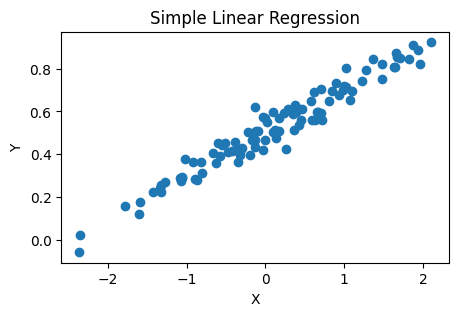

In [3]:
fig, ax = plt.subplots(figsize=(5,3))

ax.scatter(X, Y)
ax.set_title("Simple Linear Regression")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

### 2. 경사하강법 구현

$w$ 업데이트

$$
    w - \left\{LR \times x\cdot (\hat{y}-y)\text{의 평균}\right\}
$$

$b$ 업데이트

$$
    b - \left\{LR \times (\hat{y}-y)\text{의 평균}\right\}
$$

In [16]:
# 매개변수(w, b)의 초기값을 설정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)

print(f"W: {W}, b: {b}")

W: -0.2752056972125514, b: 0.9219318316443632


Epoch 0: W = 0.833710745775779, b = 0.3125382311401328, Loss = 0.4910336768659102
Epoch 10: W = 0.43615375956050906, b = 0.4085114515318245, Loss = 0.0726783534607056
Epoch 20: W = 0.28932112951453637, b = 0.4594413916256605, Loss = 0.012619394812848484
Epoch 30: W = 0.23441903131801944, b = 0.48368739836358365, Loss = 0.0037003858670924656


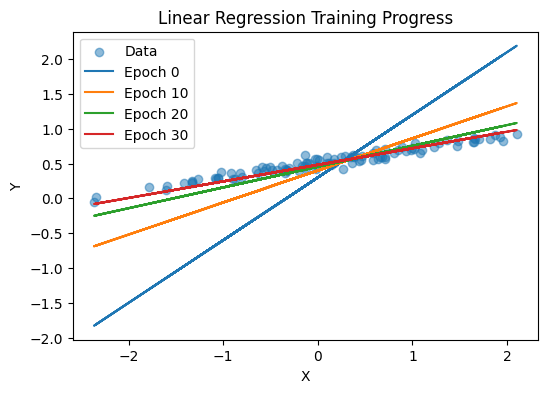

In [21]:
# 초기값
W = 0.9
b = 0.3

# 경사하강법
## 하이퍼파라미터
epoch_n = 100  # 학습 횟수
lr = 0.1  # learning rate
loss_history = []

# 플롯 설정 (한 번만 생성하여 여러 개의 선을 추가)
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="Data", alpha=0.5)  # 원본 데이터 산점도

# 반복 학습
for epoch in range(epoch_n):
    # y hat을 구한다 (y hat = W * x + b)
    yhat = W * X + b
    
    # w_grad: x(y hat - y)의 평균
    # b_grad: (y hat - y)의 평균
    w_grad = np.mean(X * (yhat - Y))
    b_grad = np.mean(yhat - Y)
    
    # 가중치 업데이트
    W -= lr * w_grad
    b -= lr * b_grad
    
    # loss = MSE = 평균오차제곱합 = (y hat - y)^2 평균
    loss = np.mean((yhat - Y)**2)
    
    # loss를 loss_history에 넣는다
    loss_history.append(loss)
    
    # Early Stop 조건 걸기
    error = np.abs(yhat - Y).mean()
    if error < 0.05:
        break


    # 10번째 epoch마다 그래프에 선 추가
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: W = {W}, b = {b}, Loss = {loss}")
        plt.plot(X, yhat, label=f"Epoch {epoch}")

# # 최종 모델의 회귀선 추가
# plt.plot(X, W * X + b, color="black", linestyle="--", label="Final Model")

# 그래프 제목 및 범례 설정
plt.title("Linear Regression Training Progress")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


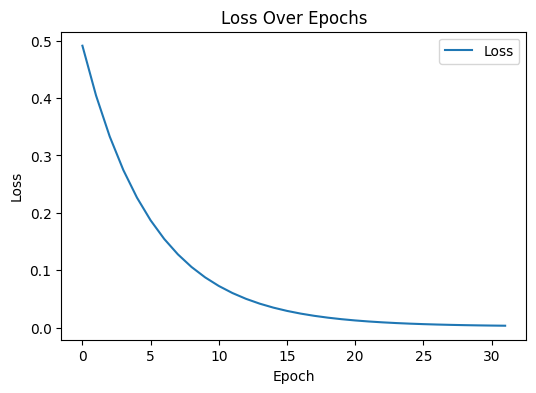

In [22]:

# 최종 Loss 그래프
plt.figure(figsize=(6, 4))
plt.plot(loss_history, label="Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()